# Estruturas Organizacionais com treinamento não Supervisionado
## MC886 - 2S2017
### Carlos Augusto Figueiredo Freitas de Carvalho - 
### Giovani Nascimento Pereira - 168609



In [9]:
#Importando os dados

import numpy
import sys
from PIL import Image, ImageFilter
from numpy import genfromtxt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import csv

from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# Constantes
nTotal = 19924
nTotal = 1000
nFeatures = 2209
nTreino = int(0.9 * nTotal)
nTeste  = 1992

#Atualizar com o caminho do csv no seu diretorio
csvPath = "./dataset/csv.noUp/data.csv"


# Pegando os dados
print('-----------Pegando os dados----------')
reader = csv.reader(open(csvPath, "r"), delimiter=",")
med = list(reader)
data= numpy.array(med).astype("float")

# print(data.shape)
# Dimensao dos dados completos: (19924, 2209) -> as expected
# 19924 documentos
# 2209 features

print('------> Done')

-----------Pegando os dados----------
------> Done


In [10]:
# Montando Grupo de teste e treino

# Separa em teste
print('-----------Montando Teste----------')
X_teste = numpy.ones((nTeste, nFeatures + 1))
for num in range(0, nTeste):
	X_teste[num, 1:(nFeatures+1)] = data[num, 0:nFeatures]

# Separa em treino
print('-----------Montando Treino----------')
X_treino = numpy.ones((nTreino, nFeatures + 1))
for num in range(0, nTreino):
	X_treino[num, 1:(nFeatures+1)] = data[num + nTeste, 0:nFeatures]
    

print('------> Done')

-----------Montando Teste----------
-----------Montando Treino----------
------> Done


### Definindo o Número de Clusters Silhouette

Estamos usando o modelo do Kmeans inicialmente.
O primeiro passo é descobrir quantos clusters há, para isso fazemos ums seção de repetidos treinos com número de cluster variável e guardamos o valor do *silhouette_score* para depois compreender o comportamento do modelo conforme o número de clusters aumenta.

In [ ]:
# Montando modelo e testando

# Define modelo do KMeans - parâmetros:
# KMeans(n_clusters=8,
#		init=’k-means++’,
#		n_init=10,
#		max_iter=300,
#		tol=0.0001,
#		precompute_distances=’auto’,
#		verbose=0, random_state=None,
#		copy_x=True, n_jobs=1, algorithm=’auto’)

kmeans = KMeans(random_state = 1)

#  Primeira parte do treinamento, treinamos usando kMeans e incrementando o
# numero de clusters a cada iteração
#

maior = 0
id_maior = 2

for i in range (2, 51):
	# altera o numero de clusters
	kmeans = KMeans(n_clusters=i)
	kmeans.fit(X_treino)
	# predição dos labels para o dataset de teste
	label_teste = kmeans.predict(X_teste)
	print('Numero de clusters: ', i)
	# calcula e imprime os silhouette_score desse modelo com esse numero de clusters
	silhouette_score_new = silhouette_score(X_teste, label_teste)
	print(silhouette_score_new, '\n')
	# confere qual o numero de clusters que deu melhor resultado
	if(silhouette_score_new > maior):
		maior = silhouette_score_new
		id_maior = i

print('Melhor cluster: ', id_maior, '\t com silhouette_score de :', maior)

# Fim do primeiro teste
#
#

#  Segundo teste, pegamos o melhor resultado do primeiro cluster e mudamos
# o init, que por padrão era kMeans++, p/ random
#

kmeans = KMeans(random_state = 1, init = 'random', n_clusters = id_maior)
kmeans.fit(X_treino)
label_teste = kmeans.predict(X_teste)
print('Mudando o método de inicialização do centroides para random: ')
silhouette_score_new = silhouette_score(X_teste, label_teste)
print(silhouette_score_new, '\n')

# Fim do segundo teste
#
#




### Definindo o Número de Clusters Elbow

Estamos usando o modelo do Kmeans.
O primeiro passo é descobrir quantos clusters há, para isso fazemos ums seção de repetidos treinos com número de cluster variável e depois plotamos os valores do erro em funcao do numero de clusters, o que nos da o "elbow graphic".
A partir desse grafico, podemos analisar 

------ Definindo melhor numero de clusters pelo elbow ----
k =  1
k =  2
k =  3
k =  4
k =  5
k =  6


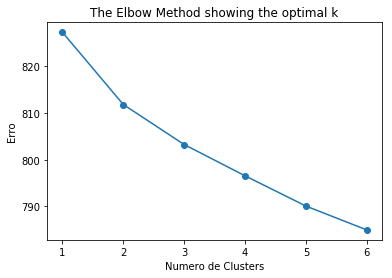

------> Done


In [33]:
# Usando o metodo do elbow
# Reference1: https://pythonprogramminglanguage.com/kmeans-elbow-method/
# Reference2: http://www.awesomestats.in/python-cluster-validation/

print('------ Definindo melhor numero de clusters pelo elbow ----')
kmeans = KMeans(random_state = 1)
distortions = []

X = X_treino

# k means determine k
distortions = []
K = range(1, 7)
for k in K:
    print('k = ', k)
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    
    # Reference 1
    #distortions.append(sum(numpy.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
     
    # Reference 2
    distortions.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'o-')
plt.xlabel('Numero de Clusters')
plt.ylabel('Erro')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print('------> Done')